In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files
df = pd.read_csv('/content/framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
pip install tensorflow

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
duplicate_rows = df[df.duplicated()]
number_of_duplicates = len(duplicate_rows)
print(number_of_duplicates)

0


In [ ]:
print(df.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


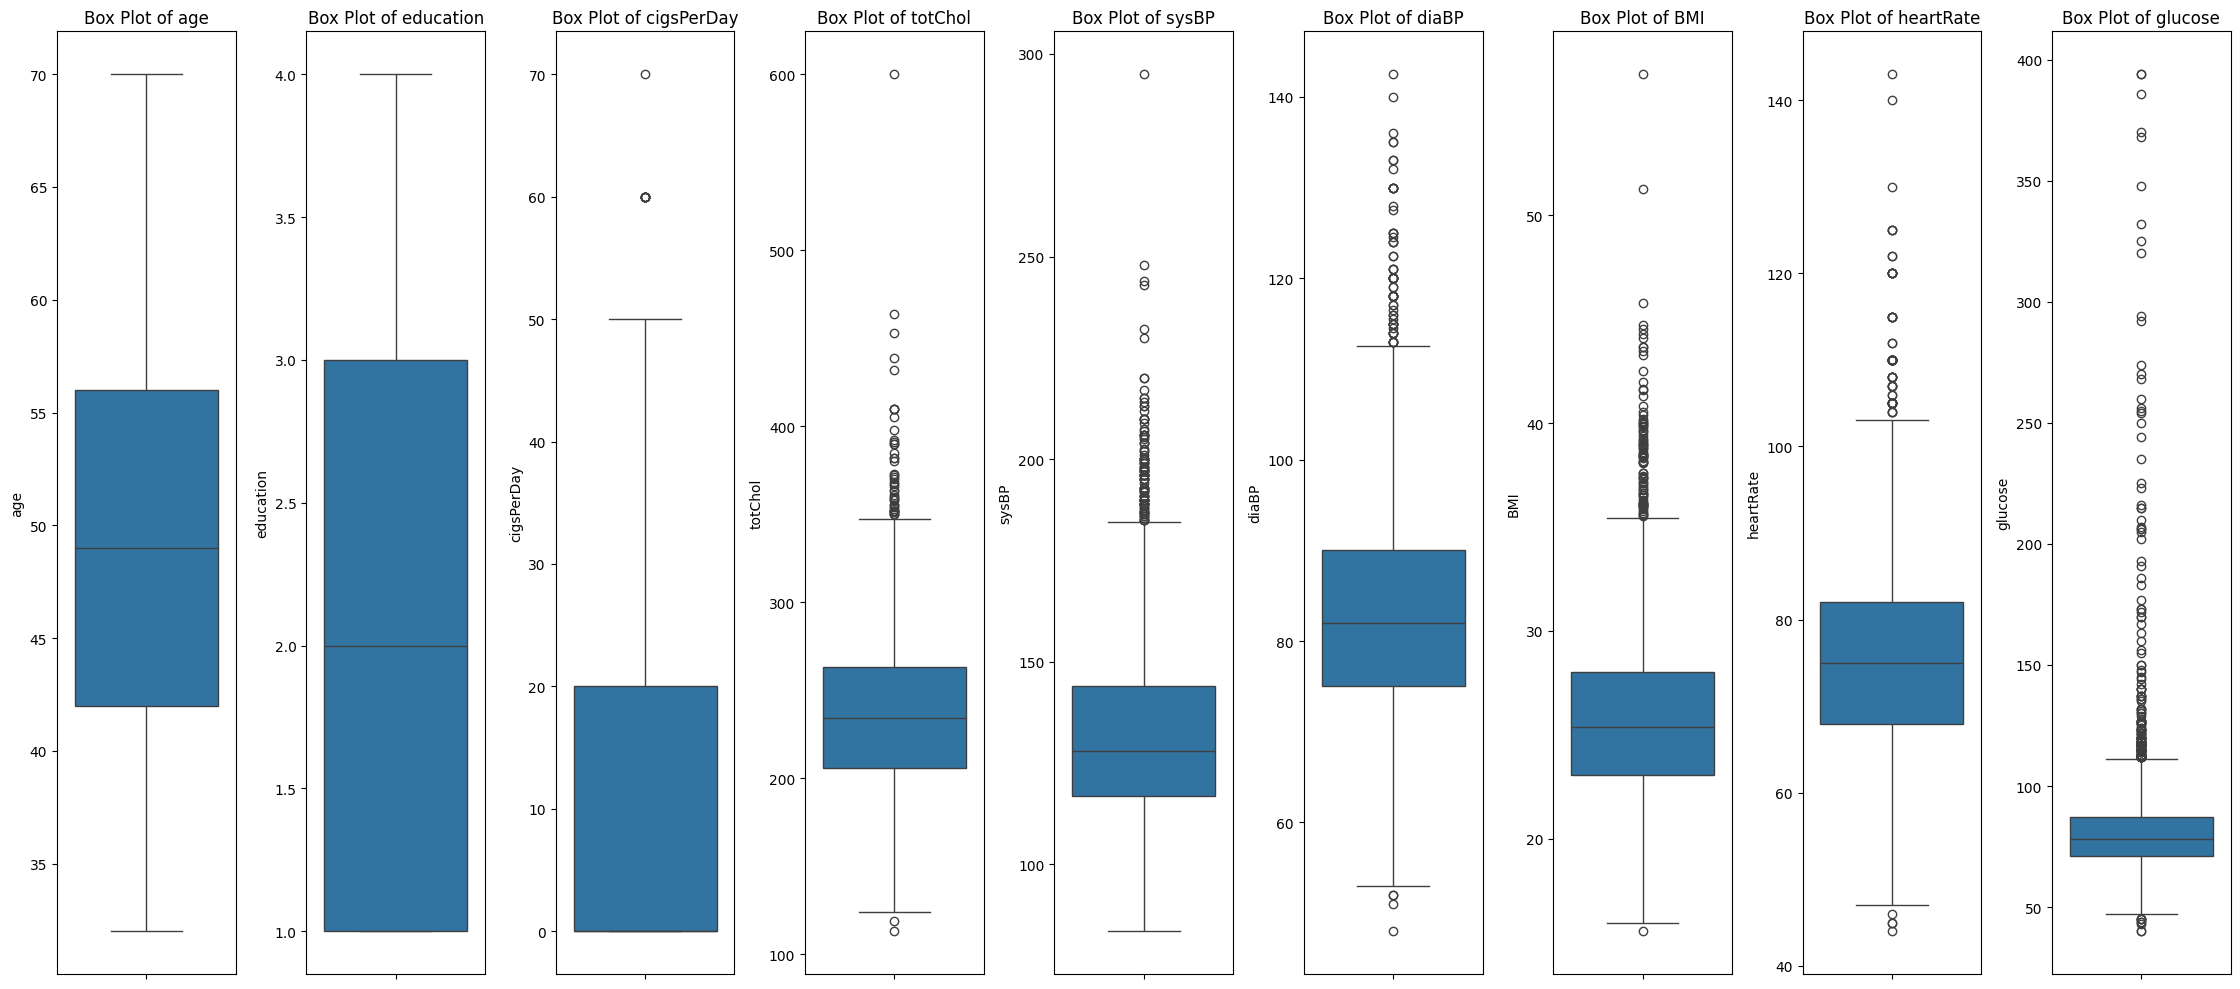

In [ ]:
f = df.copy()
columns = [	'age',	'education','cigsPerDay',		'totChol',	'sysBP',	'diaBP',	'BMI',	'heartRate',	'glucose']

plt.figure(figsize=(25, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 10, i)
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
columns = ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']  # Specify your columns

for _ in range(4):  # Repeat the process 3 times
    for col in columns:
        if col in df.columns:
            # Calculate IQR for the column
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Mark outliers
            df[col + '_outlier'] = df[col].apply(lambda x: x < lower_bound or x > upper_bound)

            # Count and print the number of outliers
            print(f"Number of outliers in {col}: {df[col + '_outlier'].sum()}")

    # Create a copy of the DataFrame excluding rows with outliers
    df_cleaned = df[~df[[col + '_outlier' for col in columns if col in df.columns]].any(axis=1)].copy()

    # Update the original DataFrame for the next iteration
    df = df_cleaned.copy()

    # Print the number of rows after each iteration
    print(f"Number of rows after dropping outliers (round {_ + 1}): {df_cleaned.shape[0]}")

# Final cleaned DataFrame after 3 iterations
df_cleaned = df.copy()


Number of outliers in age: 0
Number of outliers in education: 0
Number of outliers in cigsPerDay: 10
Number of outliers in totChol: 46
Number of outliers in sysBP: 108
Number of outliers in diaBP: 69
Number of outliers in BMI: 85
Number of outliers in heartRate: 80
Number of outliers in glucose: 175
Number of rows after dropping outliers (round 1): 3194
Number of outliers in age: 0
Number of outliers in education: 0
Number of outliers in cigsPerDay: 0
Number of outliers in totChol: 5
Number of outliers in sysBP: 40
Number of outliers in diaBP: 19
Number of outliers in BMI: 20
Number of outliers in heartRate: 70
Number of outliers in glucose: 39
Number of rows after dropping outliers (round 2): 3014
Number of outliers in age: 0
Number of outliers in education: 0
Number of outliers in cigsPerDay: 0
Number of outliers in totChol: 6
Number of outliers in sysBP: 7
Number of outliers in diaBP: 15
Number of outliers in BMI: 4
Number of outliers in heartRate: 0
Number of outliers in glucose: 0

In [ ]:
df=df_cleaned
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,TenYearCHD,age_outlier,education_outlier,cigsPerDay_outlier,totChol_outlier,sysBP_outlier,diaBP_outlier,BMI_outlier,heartRate_outlier,glucose_outlier
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,...,0,False,False,False,False,False,False,False,False,False
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,...,0,False,False,False,False,False,False,False,False,False
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,...,0,False,False,False,False,False,False,False,False,False
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,...,1,False,False,False,False,False,False,False,False,False
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,...,0,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,1,58,1.0,0,0.0,0.0,0,0,0,233.0,...,1,False,False,False,False,False,False,False,False,False
4227,1,43,4.0,1,20.0,0.0,0,0,0,187.0,...,0,False,False,False,False,False,False,False,False,False
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,...,0,False,False,False,False,False,False,False,False,False
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,...,1,False,False,False,False,False,False,False,False,False


In [ ]:
df = df.drop(['age_outlier','education_outlier', 'cigsPerDay_outlier', 'totChol_outlier', 'sysBP_outlier', 'diaBP_outlier', 'BMI_outlier', 'heartRate_outlier', 'glucose_outlier'], axis=1)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,1,58,1.0,0,0.0,0.0,0,0,0,233.0,125.5,84.0,26.05,67.0,76.0,1
4227,1,43,4.0,1,20.0,0.0,0,0,0,187.0,129.5,88.0,25.62,80.0,75.0,0
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
X_scaled_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.090637,-1.168074,1.910081,-0.998649,-0.784133,-0.132453,-0.06896,-0.560431,-0.06896,-0.956455,-1.307282,-1.102444,0.503131,0.611608,-0.089194
1,-0.916895,-0.340122,-0.027511,-0.998649,-0.784133,-0.132453,-0.06896,-0.560431,-0.06896,0.418834,-0.391546,0.020711,1.025366,2.102655,-0.183827
2,1.090637,-0.103564,-0.996308,1.001353,0.929040,-0.132453,-0.06896,-0.560431,-0.06896,0.293807,0.005273,-0.081394,0.019471,0.114593,-0.751622
3,-0.916895,1.434062,0.941285,1.001353,1.785627,-0.132453,-0.06896,1.784342,-0.06896,-0.206298,1.378877,1.450181,0.980857,-0.879439,2.371253
4,-0.916895,-0.340122,0.941285,1.001353,1.186016,-0.132453,-0.06896,-0.560431,-0.06896,1.294017,0.157896,0.327026,-0.645192,1.108624,0.667867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,1.090637,1.079225,-0.996308,-0.998649,-0.784133,-0.132453,-0.06896,-0.560431,-0.06896,-0.006256,-0.116825,0.327026,0.230145,-0.680633,-0.183827
2954,1.090637,-0.694959,1.910081,1.001353,0.929040,-0.132453,-0.06896,-0.560431,-0.06896,-1.156497,0.127371,0.735446,0.102553,0.611608,-0.278459
2955,1.090637,1.079225,0.941285,-0.998649,-0.784133,-0.132453,-0.06896,1.784342,-0.06896,-1.156497,0.829436,0.020711,-0.093285,0.611608,0.289336
2956,1.090637,2.262014,-0.996308,-0.998649,-0.784133,-0.132453,-0.06896,1.784342,-0.06896,-1.431555,2.477761,1.654391,-0.633323,-1.376454,0.100071


                     male       age  education  currentSmoker  cigsPerDay  \
male             1.000000  0.014776   0.001732       0.193306    0.315714   
age              0.014776  1.000000  -0.135606      -0.199391   -0.178606   
education        0.001732 -0.135606   1.000000       0.010518    0.009512   
currentSmoker    0.193306 -0.199391   0.010518       1.000000    0.785194   
cigsPerDay       0.315714 -0.178606   0.009512       0.785194    1.000000   
BPMeds          -0.043239  0.096255   0.021517      -0.054361   -0.043795   
prevalentStroke  0.025768  0.045875  -0.020985      -0.039312   -0.032977   
prevalentHyp     0.041524  0.258581  -0.046136      -0.082475   -0.058665   
diabetes         0.015879  0.030728   0.007647      -0.009758   -0.008505   
totChol         -0.039982  0.282046  -0.008517      -0.058472   -0.035399   
sysBP            0.022216  0.354602  -0.101988      -0.114046   -0.073390   
diaBP            0.102665  0.169161  -0.030397      -0.116044   -0.055429   

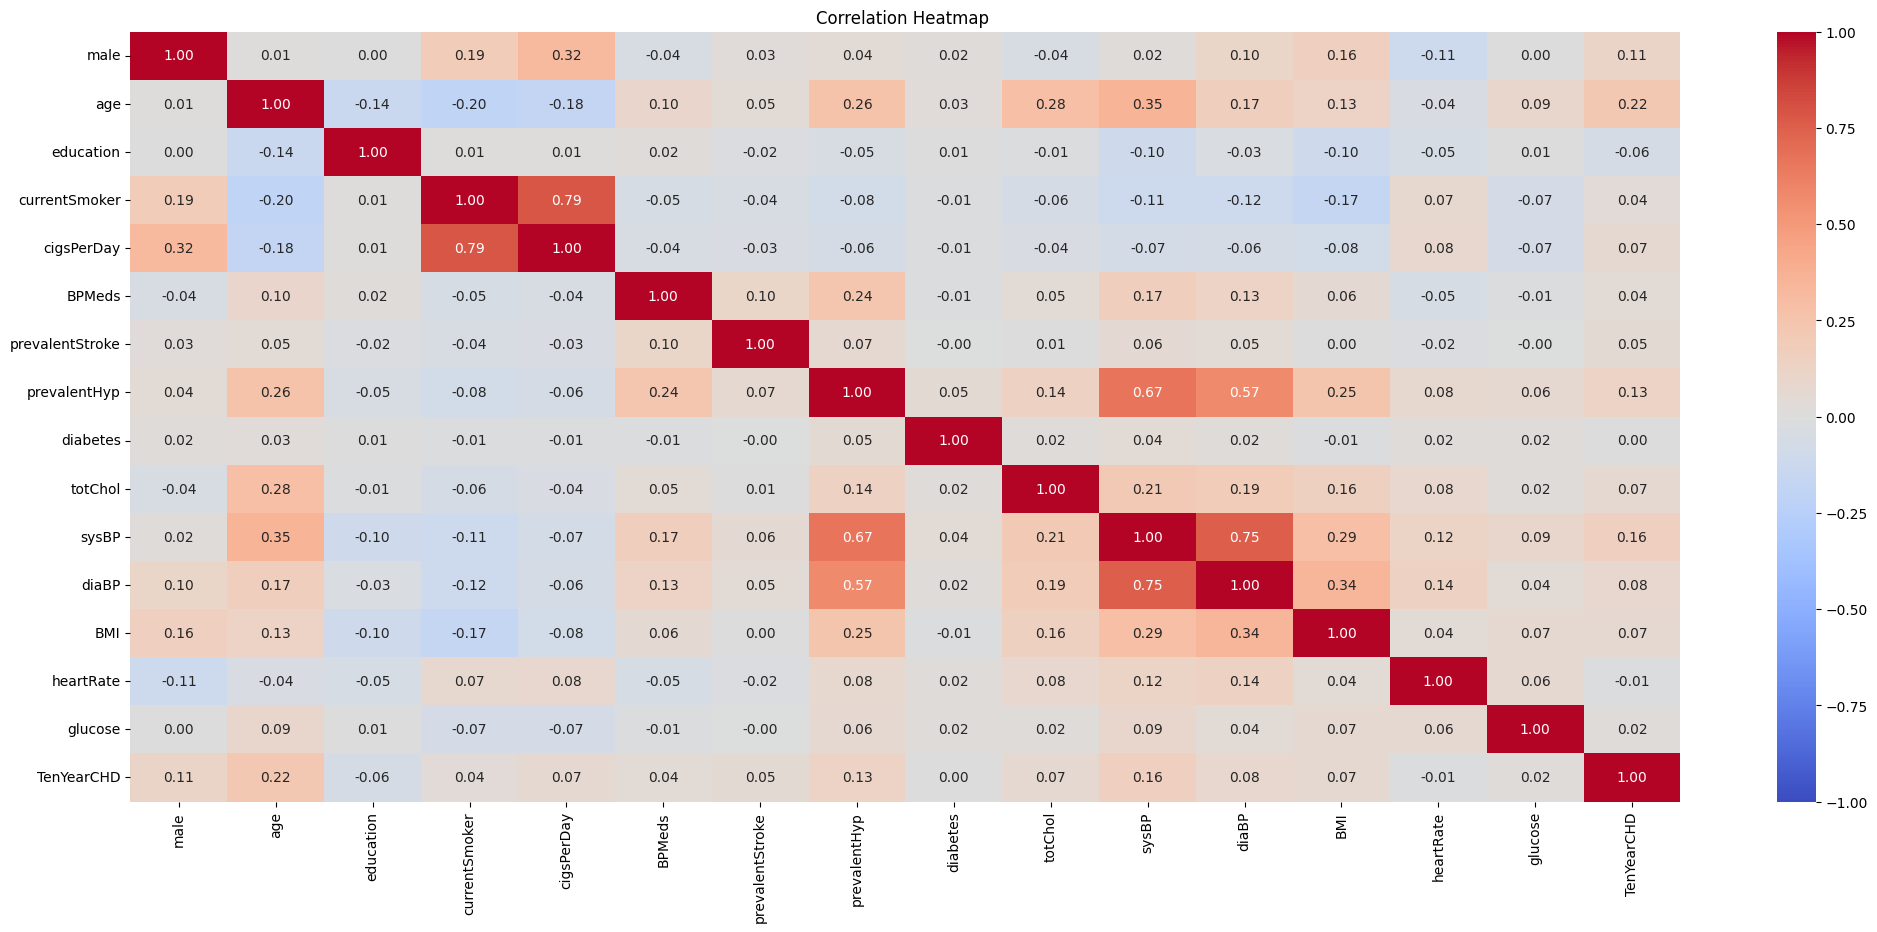

In [ ]:
correlation = df[['male',	'age',	'education','currentSmoker','cigsPerDay',	'BPMeds','prevalentStroke',	'prevalentHyp',	'diabetes',	'totChol',	'sysBP',	'diaBP',	'BMI',	'heartRate',	'glucose','TenYearCHD']].corr()
print(correlation)
plt.figure(figsize=(25, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap ')
plt.show()


In [ ]:
# Check the distribution of the target variable
df['TenYearCHD'].value_counts(normalize=True)

,proportion
TenYearCHD,
0,0.871197
1,0.128803


In [ ]:
# Apply SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [ ]:
# Create DataFrame with the resampled features
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled)

# Concatenate the resampled features and target variable
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

In [ ]:
df_resampled
df=df_resampled

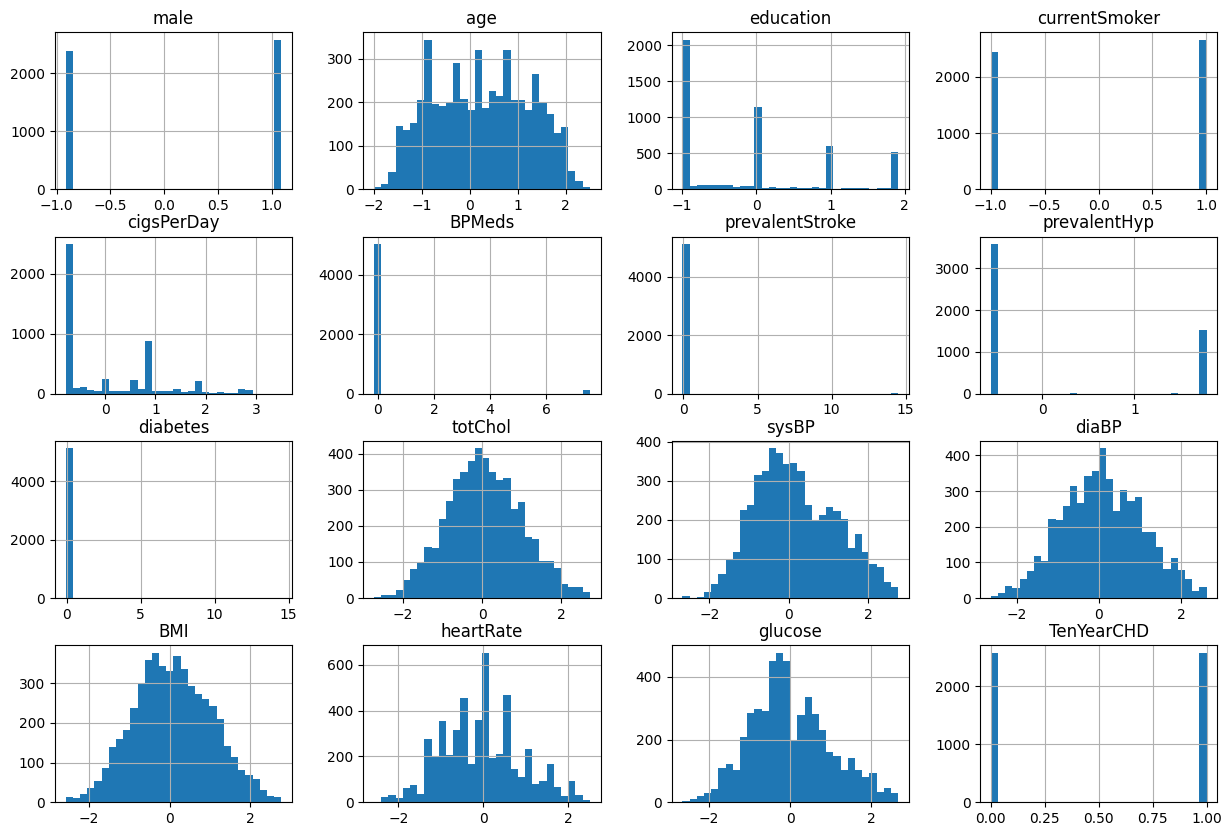

              male          age    education  currentSmoker   cigsPerDay  \
count  5154.000000  5154.000000  5154.000000    5154.000000  5154.000000   
mean      0.124483     0.245679    -0.095838       0.043476     0.073194   
std       0.989290     0.998328     0.972069       0.994697     1.016358   
min      -0.916895    -1.996027    -0.996308      -0.998649    -0.784133   
25%      -0.916895    -0.576680    -0.996308      -0.998649    -0.784133   
50%       1.032607     0.251273    -0.027511       1.001353    -0.527157   
75%       1.090637     1.079225     0.722762       1.001353     0.929040   
max       1.090637     2.498572     1.910081       1.001353     3.498800   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  5154.000000      5154.000000   5154.000000  5154.000000  5154.000000   
mean      0.052052         0.022133      0.146798    -0.009467     0.065230   
std       1.172928         1.132371      1.071577     0.879819     0.944587   

In [ ]:
# Plot histograms to check distribution
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Check summary statistics
print(df.describe())


In [ ]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.090637,-1.168074,1.910081,-0.998649,-0.784133,-0.132453,-0.06896,-0.560431,-0.06896,-0.956455,-1.307282,-1.102444,0.503131,0.611608,-0.089194,0
1,-0.916895,-0.340122,-0.027511,-0.998649,-0.784133,-0.132453,-0.06896,-0.560431,-0.06896,0.418834,-0.391546,0.020711,1.025366,2.102655,-0.183827,0
2,1.090637,-0.103564,-0.996308,1.001353,0.929040,-0.132453,-0.06896,-0.560431,-0.06896,0.293807,0.005273,-0.081394,0.019471,0.114593,-0.751622,0
3,-0.916895,1.434062,0.941285,1.001353,1.785627,-0.132453,-0.06896,1.784342,-0.06896,-0.206298,1.378877,1.450181,0.980857,-0.879439,2.371253,1
4,-0.916895,-0.340122,0.941285,1.001353,1.186016,-0.132453,-0.06896,-0.560431,-0.06896,1.294017,0.157896,0.327026,-0.645192,1.108624,0.667867,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5149,1.090637,0.752500,-0.996308,1.001353,0.944404,-0.132453,-0.06896,-0.560431,-0.06896,0.432178,1.270879,0.531236,0.571324,1.358247,2.469281,1
5150,1.090637,1.051592,1.112018,1.001353,1.634668,-0.132453,-0.06896,1.784342,-0.06896,0.082082,2.348654,1.924717,0.930198,-0.616668,1.775535,1
5151,1.090637,-1.626254,0.880115,1.001353,2.534043,-0.132453,-0.06896,-0.560431,-0.06896,-1.399722,-0.923641,-1.771527,-1.194399,-0.115595,-0.792478,1
5152,1.090637,0.618784,-0.027511,1.001353,0.309549,-0.132453,-0.06896,1.784342,-0.06896,0.098223,1.861270,1.434222,0.962947,-0.392192,-1.025379,1


In [ ]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # Output layer with sigmoid activation for binary classification

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6292 - loss: 0.6390 - val_accuracy: 0.6916 - val_loss: 0.5881
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6955 - loss: 0.5838 - val_accuracy: 0.6945 - val_loss: 0.5827
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7101 - loss: 0.5635 - val_accuracy: 0.6945 - val_loss: 0.5714
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7322 - loss: 0.5416 - val_accuracy: 0.7071 - val_loss: 0.5642
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7363 - loss: 0.5294 - val_accuracy: 0.7071 - val_loss: 0.5582
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7402 - loss: 0.5240 - val_accuracy: 0.7255 - val_loss: 0.5476
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7584 - loss: 0.5078 - val_accuracy: 0.7313 - val_loss: 0.5384
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7713 - loss: 0.4906 - val_accuracy: 0.7216 - val_

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7906 - loss: 0.4565 
Test accuracy: 0.795344352722168


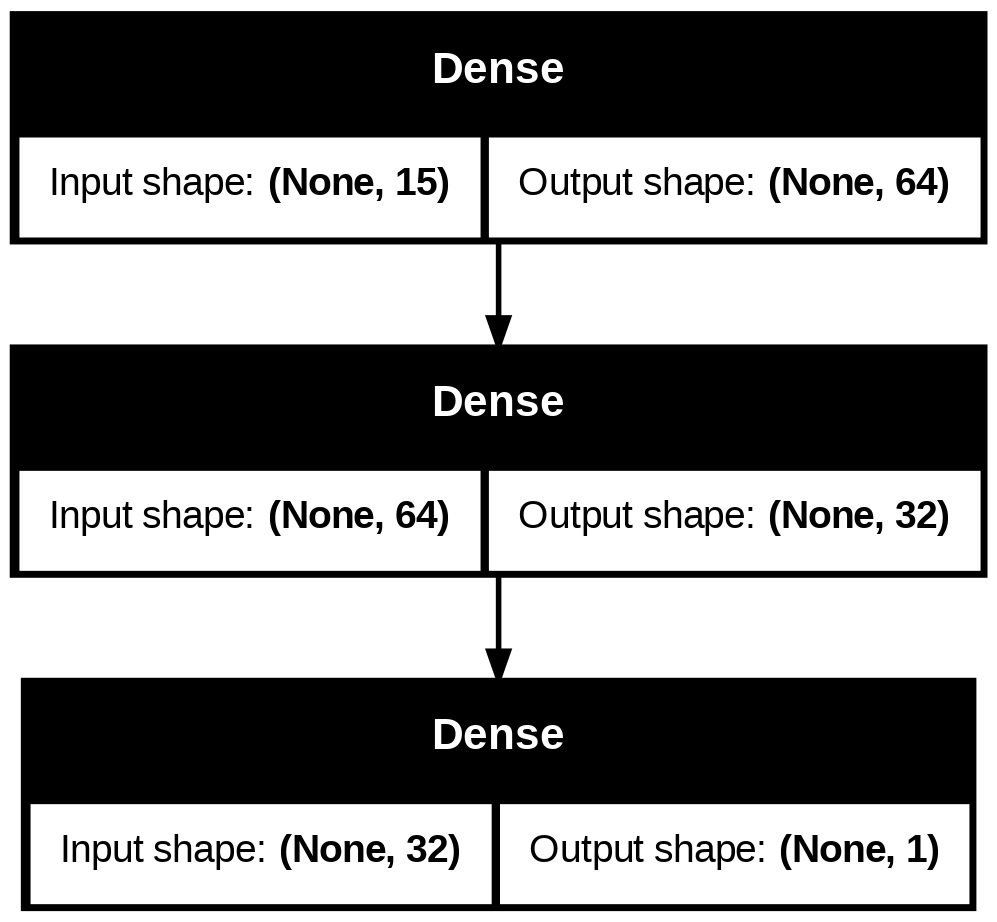

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

Text(0.5, 1.0, 'Model accuracy')

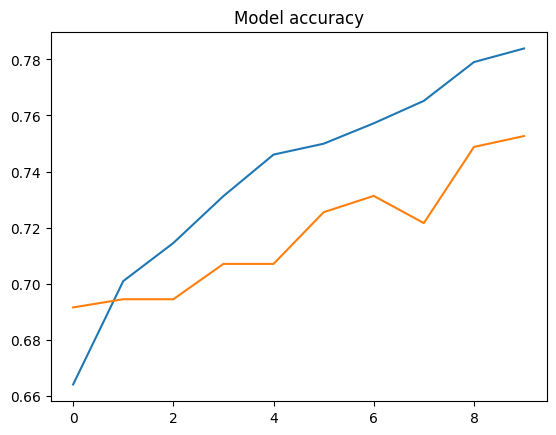

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,413 (36.77 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,276 (24.52 KB)